# Пребарување со униформна цена

## Референци

1. [Пребарување со униформна цена](https://en.wikipedia.org/wiki/Dijkstra's_algorithm#Practical_optimizations_and_infinite_graphs)
1. [Податочна структура хип](https://en.wikipedia.org/wiki/Heap_(data_structure))
1. [Објаснување за временската сложеност со пајтон примери](https://towardsdatascience.com/understanding-time-complexity-with-python-examples-2bda6e8158a7)
1. [Објаснување за нотација за пресметковна сложеност](https://www.youtube.com/watch?v=__vX2sjlpXU)
1. [Временска сложеност на операциите на податочните структури во пајтон](https://www.ics.uci.edu/~brgallar/week8_2.html#overview)
1. [Објаснување за хип структура](https://www.youtube.com/watch?v=g9YK6sftDi0)

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('e6PgjjiUIg8')

![](images/weighted_graph.png)

## Претставување тежински граф преку речник

In [2]:
class WeightedGraph:
    def __init__(self):
        """
        Initialises an empty dict as the graph data structure.
        """
        self.graph_dict = {}
    
    def add_vertex(self, vertex):
        """
        Adds a vertex to the graph.
        
        Args:
            vertex: vertex to be added in the graph
        """
        if vertex not in self.graph_dict:
            self.graph_dict[vertex] = {}
    
    def vertices(self):
        """
        Returns the graph's vertices.
        """
        return list(self.graph_dict.keys())
    
    def add_edge(self, edge, add_reversed=True):
        """
        Adds an edge to the graph.
        
        Args:
            edge: a tupple of three vertices, (first_vertex, second_vertex, weight)
            add_reversed: whether to add the edge in reversed direction, (second_vertex, first_vertex)
        """
        vertex1, vertex2, weight = edge
        self.graph_dict[vertex1][vertex2] = weight
        if add_reversed:
            self.graph_dict[vertex2][vertex1] = weight
    
    def edges(self):
        """
        Returns a list of all edges in the graph, with respected weights.
        """
        edges = []
        for vertex in self.graph_dict:
            for neighbour, weight in self.graph_dict[vertex].items():
                edges.append((vertex, neighbour, weight))
        return edges
    
    def neighbours(self, vertex):
        """
        Returns all neighbours of the given vertex.
        """
        return list(self.graph_dict[vertex].items())

In [3]:
g = WeightedGraph()

In [4]:
g.add_vertex('A')
g.add_vertex('B')
g.add_vertex('C')
g.add_vertex('D')
g.add_vertex('E')
g.add_vertex('F')

In [5]:
g.vertices()

['A', 'B', 'C', 'D', 'E', 'F']

In [6]:
g.add_edge(('A', 'B', 2))
g.add_edge(('A', 'C', 4))
g.add_edge(('A', 'E', 5))
g.add_edge(('B', 'E', 1))
g.add_edge(('E', 'D', 3))
g.add_edge(('E', 'F', 2))
g.add_edge(('F', 'D', 1))
g.add_edge(('C', 'D', 3))

In [7]:
g.edges()

[('A', 'B', 2),
 ('A', 'C', 4),
 ('A', 'E', 5),
 ('B', 'A', 2),
 ('B', 'E', 1),
 ('C', 'A', 4),
 ('C', 'D', 3),
 ('D', 'E', 3),
 ('D', 'F', 1),
 ('D', 'C', 3),
 ('E', 'A', 5),
 ('E', 'B', 1),
 ('E', 'D', 3),
 ('E', 'F', 2),
 ('F', 'E', 2),
 ('F', 'D', 1)]

In [8]:
g.neighbours('A')

[('B', 2), ('C', 4), ('E', 5)]

## Пребарување со униформна цена

In [9]:
import heapq

In [10]:
def uniform_cost_search(graph, starting_vertex, goal_vertex, verbose=False):
    """
    Returns the path from starting_vertex to goal_vertex using the uniform-cost algorithm.
    """
    # Ако почетниот јазол е еднаков на целниот, тогаш нема логика да пребаруваме воопшто
    if starting_vertex == goal_vertex:
        if verbose:
            print('Почетниот и бараниот јазол се исти')
        return
    # Користиме множество на разгранети јазли. 
    # За разгранет јазол го сметаме оној јазол на кој ќе му ги истражиме и испроцесираме соседите.
    expanded = set()
    # Користиме листа која ни е подредена редица од која ќе го земаме следниот јазол за разгранување.
    # Тука ја памтиме и моменталната патека за секој јазол од почетниот. Дополнително, ја памтиме и цената на патот до тој момент.
    # Редицата ја преуредуваме на специјален начин така што ќе ја направиме хип структура (анг. heap).
    # Понатаму, со редицата ќе работиме само преку heapq библиотеката.
    queue = [(0, [starting_vertex])]
    heapq.heapify(queue)
    # Пребаруваме сѐ додека има јазли за разгранување во редицата.
    while queue:
        if verbose:
            print('Ред за разгранување:')
            for element in queue:
                print(element, end=' ')
            print()
            print()
        # Членови на редицата јазли се патеките од почетниот јазол до некој јазол кој треба да се разграни.
        # За да го земеме наредниот јазол за разгранување, ние треба од редицата да ја извадиме патеката на тој јазол.
        weight, vertex_list = heapq.heappop(queue)
        # Јазолот за разгранување е последниот во оваа листа.
        vertex_to_expand = vertex_list[-1]
        # Тука ја вршиме проверката дали сме стигнале до целниот јазол.
        if vertex_to_expand == goal_vertex:
            if verbose:
                print('Го пронајдовме посакуваниот јазол {}. Патеката да стигнеме до тука е {} со цена {}'
                      .format(vertex_to_expand, vertex_list, weight))
            return weight, vertex_list
        # Ако веќе сме го разграниле овој јазол, нема логика да го разгрануваме пак.
        if vertex_to_expand in expanded:
            if verbose:
                print('{} е веќе разгранет'.format(vertex_to_expand, weight, vertex_list))
            continue
        if verbose:
            print('Го разгрануваме јазолот {} од ({}, {})'.format(vertex_to_expand, weight, vertex_list))
        # На оваа линија код, сигурни сме дека не сме го разграниле моменталниот јазол. Го разгрануваме така што пребаруваме низ сите негови соседи.
        for neighbour, new_weight in graph.neighbours(vertex_to_expand):
            if neighbour in expanded:
                if verbose:
                    print('{} е веќе разгранет'.format(neighbour))
            else:
                # Ако моменталниот сосед не е разгранет, го додаваме во редицата на јазли за разгранување.
                if verbose:
                    print('{} со тежина {}, кој е соседен јазол на {}, го додаваме во редот за разгранување со нова '
                          'цена и го означуваме како разгранет'.format(neighbour, new_weight, vertex_to_expand))
                # Бидејќи ова е пребарување со униформна цена, соседот кој го додаваме ќе биде соодветно додаден преку библиотеката heapq.
                heapq.heappush(queue, (weight + new_weight, vertex_list + [neighbour]))
        # Откако го разгранивме јазолот, го додаваме во множеството разгранети јазли.
        expanded.add(vertex_to_expand)
        if verbose:
            print()

In [11]:
uniform_cost_search(g, starting_vertex='A', goal_vertex='F', verbose=True)

Ред за разгранување:
(0, ['A']) 

Го разгрануваме јазолот A од (0, ['A'])
B со тежина 2, кој е соседен јазол на A, го додаваме во редот за разгранување со нова цена и го означуваме како разгранет
C со тежина 4, кој е соседен јазол на A, го додаваме во редот за разгранување со нова цена и го означуваме како разгранет
E со тежина 5, кој е соседен јазол на A, го додаваме во редот за разгранување со нова цена и го означуваме како разгранет

Ред за разгранување:
(2, ['A', 'B']) (4, ['A', 'C']) (5, ['A', 'E']) 

Го разгрануваме јазолот B од (2, ['A', 'B'])
A е веќе разгранет
E со тежина 1, кој е соседен јазол на B, го додаваме во редот за разгранување со нова цена и го означуваме како разгранет

Ред за разгранување:
(3, ['A', 'B', 'E']) (5, ['A', 'E']) (4, ['A', 'C']) 

Го разгрануваме јазолот E од (3, ['A', 'B', 'E'])
A е веќе разгранет
B е веќе разгранет
D со тежина 3, кој е соседен јазол на E, го додаваме во редот за разгранување со нова цена и го означуваме како разгранет
F со тежина 2, 

(5, ['A', 'B', 'E', 'F'])

## За пресметковните сложености

![](images/big-o.webp)

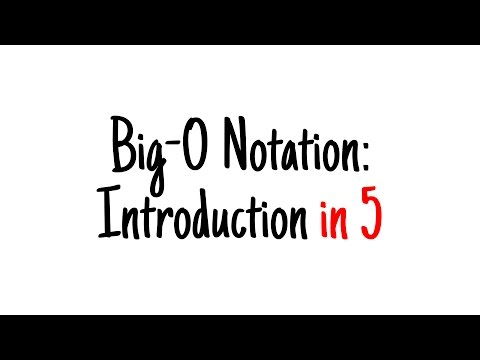

In [12]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('__vX2sjlpXU')